In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import sklearn.datasets
from scipy import stats
from ipywidgets import interact, interact_manual
%matplotlib inline


In [4]:
diamanti=pd.read_csv('diamonds.csv')
diamanti.head()

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

In [ ]:
diamanti.count()


In [5]:
diamanti.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [75]:
diamanti.describe()


         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

          Unnamed: 0         carat    cut  color clarity         depth  \
count   53940.000000  53940.000000  53940  53940   53940  53940.000000   
unique           NaN           NaN      5      7       8           NaN   
top              NaN           NaN  Ideal      G     SI1           NaN   
freq             NaN           NaN  21551  11292   13065           NaN   
mean    26970.500000      0.797940    NaN    NaN     NaN     61.749405   
std     15571.281097      0.474011    NaN    NaN     NaN      1.432621   
min         1.000000      0.200000    NaN    NaN     NaN     43.000000   
25%     13485.750000      0.400000    NaN    NaN     NaN     61.000000   
50%     26970.500000      0.700000    NaN    NaN     NaN     61.800000   
75%     40455.250000      1.040000    NaN    NaN     NaN     62.500000   
max     53940.000000      5.010000    NaN    NaN     NaN     79.000000   

               table         price             x             y             z  
count   53940.000000  53940.0000

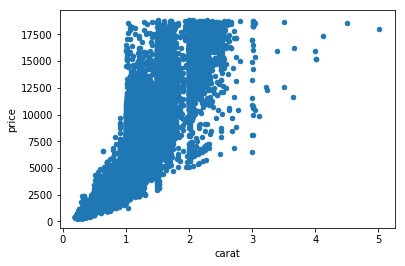

In [11]:
diamanti.plot.scatter(x='carat',y='price')


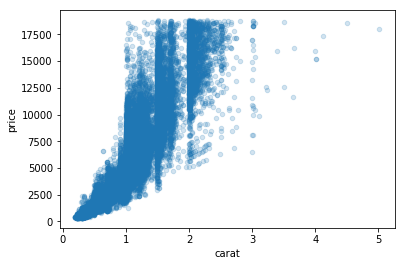

In [12]:
diamanti.plot.scatter(x='carat', y='price', alpha=0.2)

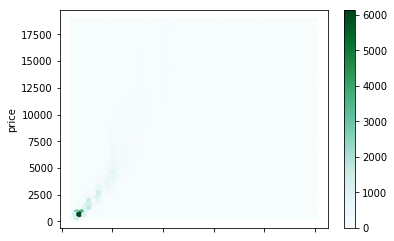

In [16]:
diamanti.plot.hexbin(x='carat', y='price',gridsize=50)

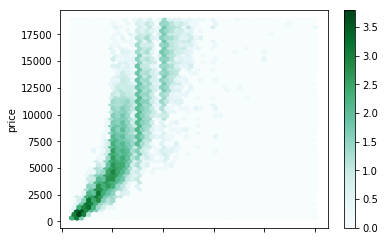

In [74]:
diamanti.plot.hexbin(x='carat', y='price',gridsize=50, bins='log')
   

In [18]:
diamanti.cut.unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

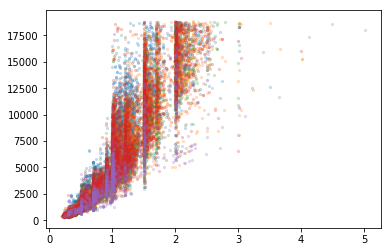

In [35]:
fig,ax=plt.subplots()
for cut in diamanti.cut.unique():
   sotto=diamanti[diamanti.cut==cut]
   ax.scatter(sotto.carat, sotto.price,alpha=0.2,s=5)



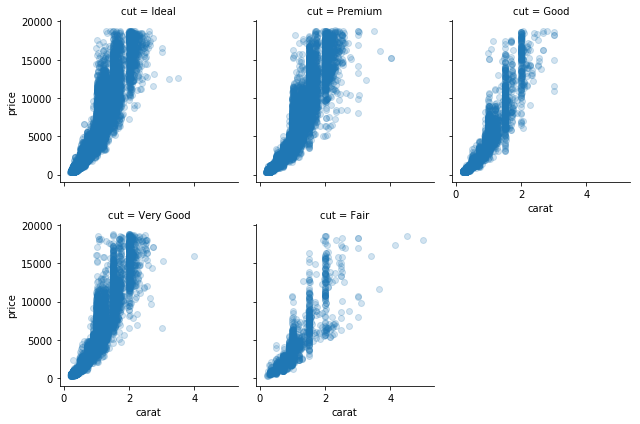

In [52]:
g=sns.FacetGrid(diamanti, col='cut', aspect=1.0, col_wrap=3)
g.map(plt.scatter, 'carat', 'price', alpha=0.2)


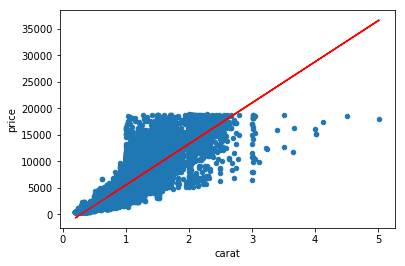

In [70]:
diamanti.plot.scatter(x='carat',y='price')
slope, intercept, *rest=stats.linregress(diamanti.carat, diamanti.price)
plt.plot(diamanti.carat, diamanti.carat*slope+intercept,color='red')

In [59]:
anscombe=sns.load_dataset('anscombe')
anscombe.head(n=20)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13

In [67]:
def statistiche(ds):
  return [np.mean(ds), np.var(ds), np.corrcoef(ds.x,ds.y)[0][1]]
pd.set_option('max_colwidth', 100)
anscombe.groupby('dataset').apply(statistiche).head()


dataset
I        [[9.0, 7.500909090909093], [10.0, 3.7520628099173554], 0.81642051634484]
II     [[9.0, 7.500909090909091], [10.0, 3.7523900826446277], 0.8162365060002427]
III     [[9.0, 7.500000000000001], [10.0, 3.747836363636364], 0.8162867394895982]
IV        [[9.0, 7.50090909090909], [10.0, 3.74840826446281], 0.8165214368885031]
dtype: object

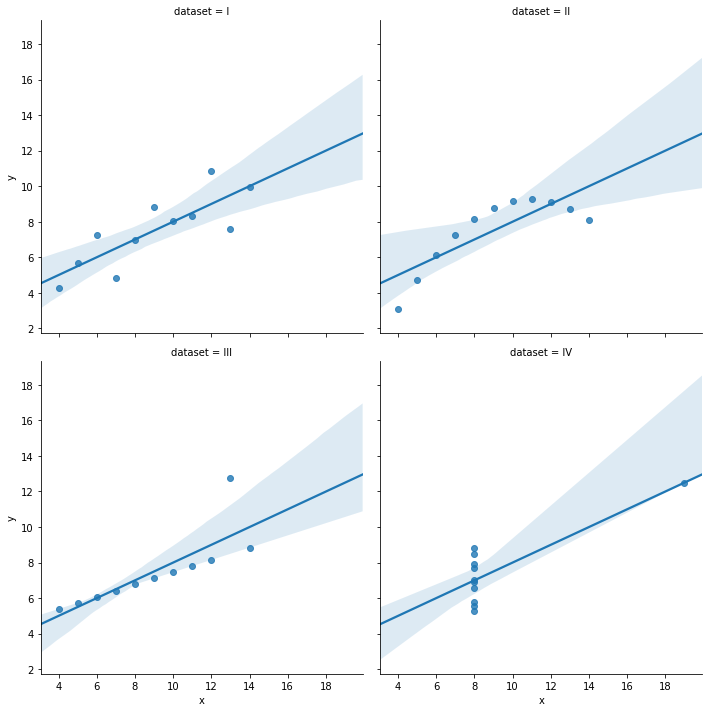

In [69]:
sns.lmplot(data=anscombe, x='x', y='y', col='dataset', col_wrap=2)